In [1]:
!pip install keras

In [9]:
!pip install tensorflow

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


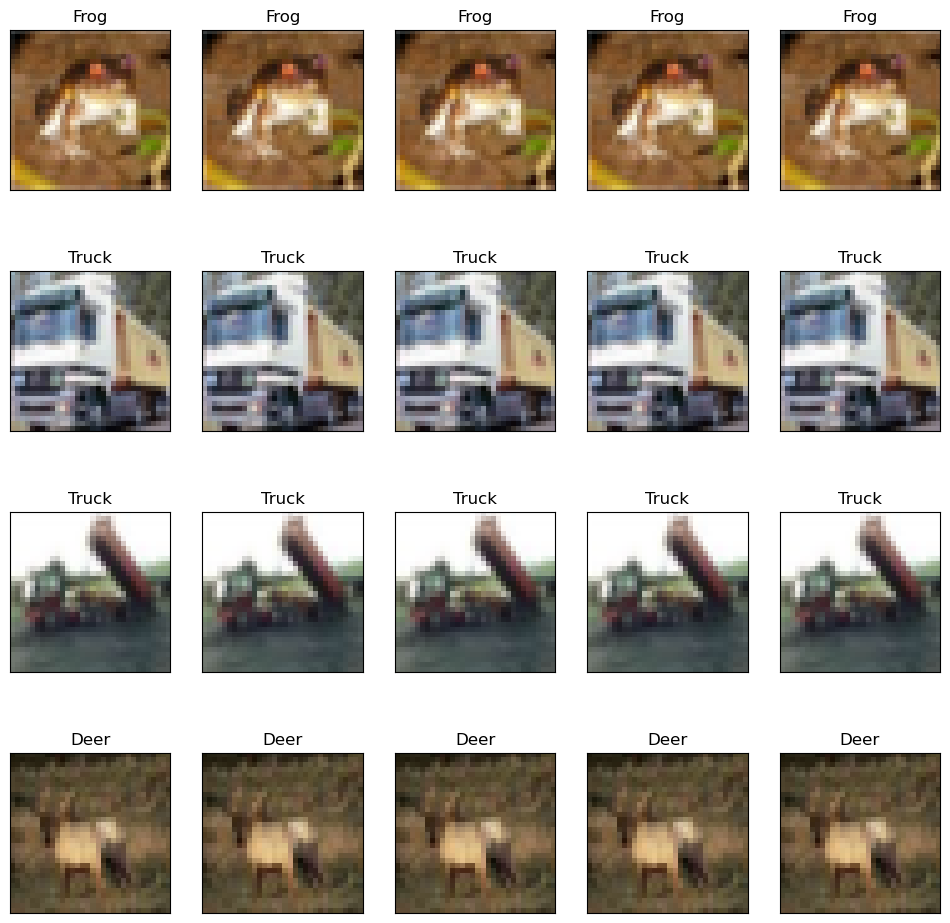

In [11]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

fig,axes = plt.subplots(ncols = 5, nrows = 4, figsize = (12, 12))

index = 0
for i in range(4):
    for j in range(5):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
    index += 1

In [13]:
#Normalization
X_train  = X_train/255.0
X_test  = X_test/255.0

In [14]:
#OneHotEncoding
from tensorflow.keras.utils import to_categorical



In [15]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
#Model Building

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization


model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

# Pooling layer
model.add(MaxPool2D( pool_size = (2,2)))

# Dropout Layer
model.add(Dropout(0.25))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

In [17]:
#Compiling and Training model

# compilation
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
metrics = 'accuracy')

# model training
model.fit(X_train, y_train, epochs=1)

1563/1563 [==============================] - 551s 310ms/step - loss: 1.5860 - accuracy: 0.4308


In [18]:
#Model Evaluation

prediction = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {prediction[1] * 100:.2f}%')

313/313 [==============================] - 59s 62ms/step - loss: 2.1017 - accuracy: 0.4016
Test Accuracy : 40.16%
